# Librerias

In [62]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
import warnings
warnings.filterwarnings("ignore")

# 1. Declarar Universos de discurso

In [63]:
# Variables de entrada
vertimiento = ctrl.Antecedent(np.arange(0, 36, 1), 'vertimiento')
ton_CO2 = ctrl.Antecedent(np.arange(1500, 12701, 1), 'ton_CO2')
lts_Agua = ctrl.Antecedent(np.arange(75, 901, 1), 'lts_Agua')

# Variable de salida
riesgo = ctrl.Consequent(np.arange(0, 101, 1), 'riesgo')

# 2. Construir los conjuntos borrosos para los Antecedentes

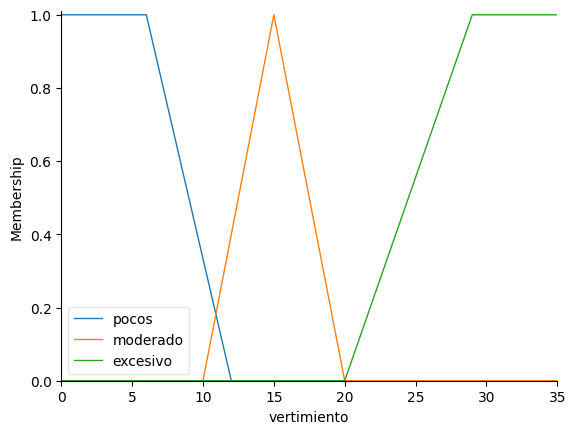

In [64]:
vertimiento['pocos'] = fuzz.trapmf(vertimiento.universe, [0, 0, 6, 12])
vertimiento['moderado'] = fuzz.trimf(vertimiento.universe, [10, 15, 20])
vertimiento['excesivo'] = fuzz.trapmf(vertimiento.universe, [20, 29, 35, 35])


vertimiento.view()
plt.show()

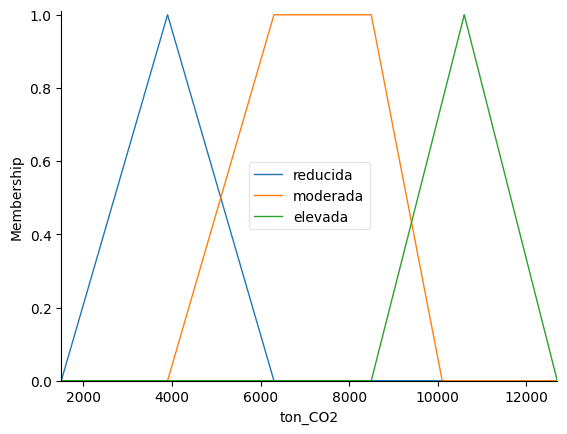

In [65]:
ton_CO2['reducida'] = fuzz.trimf(ton_CO2.universe, [1500, 3900, 6300])
ton_CO2['moderada'] = fuzz.trapmf(ton_CO2.universe, [3900, 6300, 8500, 10100])
ton_CO2['elevada'] = fuzz.trimf(ton_CO2.universe, [8500, 10600, 12700])

ton_CO2.view()
plt.show()

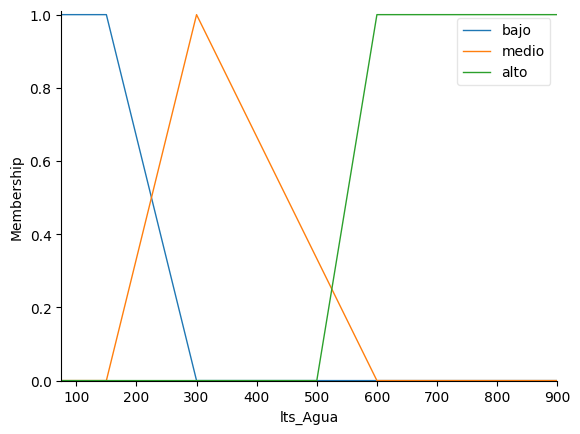

In [66]:
lts_Agua['bajo'] = fuzz.trapmf(lts_Agua.universe, [75, 75, 150, 300])
lts_Agua['medio'] = fuzz.trimf(lts_Agua.universe, [150,300,600])
lts_Agua['alto'] = fuzz.trapmf(lts_Agua.universe, [500,600,900,900])

lts_Agua.view()
plt.show()

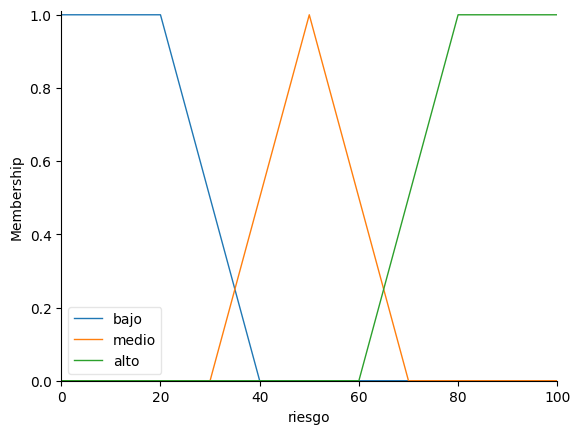

In [67]:
riesgo['bajo'] = fuzz.trapmf(riesgo.universe, [0,0,20,40])
riesgo['medio'] = fuzz.trimf(riesgo.universe, [30,50,70])
riesgo['alto'] = fuzz.trapmf(riesgo.universe, [60,80,100,100])


riesgo.view()
plt.show()

# 3. Definir las funciones monotonas para el consecuente

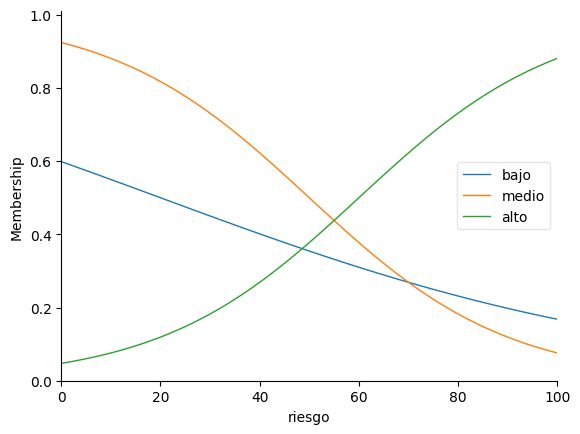

In [68]:
riesgo['bajo'] = fuzz.sigmf(riesgo.universe, 20, -0.02)
riesgo['medio'] = fuzz.sigmf(riesgo.universe, 50, -0.05)
riesgo['alto'] = fuzz.sigmf(riesgo.universe, 60, 0.05)
# todas son sigmoideas porque son mon (creciente o decreciente)

riesgo.view()
plt.show()

# 4. Base del conocimiento

In [69]:
regla1 = ctrl.Rule(vertimiento['pocos'] & ton_CO2['reducida'] & lts_Agua['bajo'], riesgo['bajo'])
regla2 = ctrl.Rule(vertimiento['pocos'] & ton_CO2['reducida'] & lts_Agua['medio'], riesgo['bajo'])
regla3 = ctrl.Rule(vertimiento['pocos'] & ton_CO2['reducida'] & lts_Agua['alto'], riesgo['medio'])
regla4 = ctrl.Rule(vertimiento['pocos'] & ton_CO2['moderada'] & lts_Agua['bajo'], riesgo['bajo'])
regla5 = ctrl.Rule(vertimiento['pocos'] & ton_CO2['moderada'] & lts_Agua['medio'], riesgo['medio'])
regla6 = ctrl.Rule(vertimiento['pocos'] & ton_CO2['moderada'] & lts_Agua['alto'], riesgo['medio'])
regla7 = ctrl.Rule(vertimiento['pocos'] & ton_CO2['elevada'] & lts_Agua['bajo'], riesgo['medio'])
regla8 = ctrl.Rule(vertimiento['pocos'] & ton_CO2['elevada'] & lts_Agua['medio'], riesgo['medio'])
regla9 = ctrl.Rule(vertimiento['pocos'] & ton_CO2['elevada'] & lts_Agua['alto'], riesgo['medio'])
regla10 = ctrl.Rule(vertimiento['moderado'] & ton_CO2['reducida'] & lts_Agua['bajo'], riesgo['bajo'])
regla11 = ctrl.Rule(vertimiento['moderado'] & ton_CO2['reducida'] & lts_Agua['medio'], riesgo['medio'])
regla12 = ctrl.Rule(vertimiento['moderado'] & ton_CO2['reducida'] & lts_Agua['alto'], riesgo['medio'])
regla13 = ctrl.Rule(vertimiento['moderado'] & ton_CO2['moderada'] & lts_Agua['bajo'], riesgo['medio'])
regla14 = ctrl.Rule(vertimiento['moderado'] & ton_CO2['moderada'] & lts_Agua['medio'], riesgo['medio'])
regla15 = ctrl.Rule(vertimiento['moderado'] & ton_CO2['moderada'] & lts_Agua['alto'], riesgo['medio'])
regla16 = ctrl.Rule(vertimiento['moderado'] & ton_CO2['elevada'] & lts_Agua['bajo'], riesgo['medio'])
regla17 = ctrl.Rule(vertimiento['moderado'] & ton_CO2['elevada'] & lts_Agua['medio'], riesgo['medio'])
regla18 = ctrl.Rule(vertimiento['moderado'] & ton_CO2['elevada'] & lts_Agua['alto'], riesgo['alto'])
regla19 = ctrl.Rule(vertimiento['excesivo'] & ton_CO2['reducida'] & lts_Agua['bajo'], riesgo['medio'])
regla20 = ctrl.Rule(vertimiento['excesivo'] & ton_CO2['reducida'] & lts_Agua['medio'], riesgo['medio'])
regla21 = ctrl.Rule(vertimiento['excesivo'] & ton_CO2['reducida'] & lts_Agua['alto'], riesgo['medio'])
regla22 = ctrl.Rule(vertimiento['excesivo'] & ton_CO2['moderada'] & lts_Agua['bajo'], riesgo['medio'])
regla23 = ctrl.Rule(vertimiento['excesivo'] & ton_CO2['moderada'] & lts_Agua['medio'], riesgo['medio'])
regla24 = ctrl.Rule(vertimiento['excesivo'] & ton_CO2['moderada'] & lts_Agua['alto'], riesgo['alto'])
regla25 = ctrl.Rule(vertimiento['excesivo'] & ton_CO2['elevada'] & lts_Agua['bajo'], riesgo['medio'])
regla26 = ctrl.Rule(vertimiento['excesivo'] & ton_CO2['elevada'] & lts_Agua['medio'], riesgo['alto'])
regla27 = ctrl.Rule(vertimiento['excesivo'] & ton_CO2['elevada'] & lts_Agua['alto'], riesgo['alto'])

# 5. Uso del motor de inferencia

In [73]:
control = ctrl.ControlSystem([regla1, regla2, regla3, regla4, regla5, regla6, regla7, regla8, regla9, regla10, regla11, regla12, regla13, regla14, regla15, regla16, regla17, regla18, regla19, regla20, regla21, regla22, regla23, regla24, regla25, regla26, regla27])
riesgo_calculado = ctrl.ControlSystemSimulation(control)
riesgo_calculado.input['vertimiento'] = 2
riesgo_calculado.input['ton_CO2'] = 3700
riesgo_calculado.input['lts_Agua'] = 340
riesgo_calculado.compute()

riesgo_calculado.output['riesgo']
print(f'Riesgo: {riesgo_calculado.output['riesgo']:.2f}%')

MAPE = abs(riesgo_calculado.output['riesgo'] - 38)*100 / 38 
print(f'MAPE: {MAPE:.2f}%')

Riesgo: 39.92%
MAPE: 5.04%


# Reglas activadas

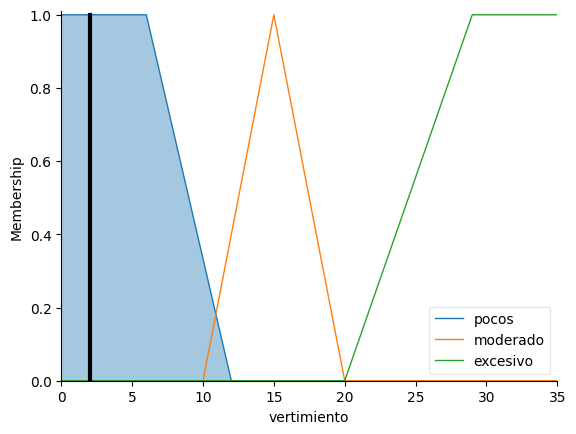

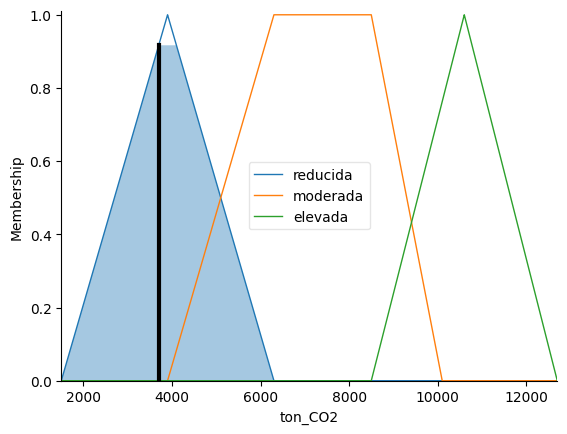

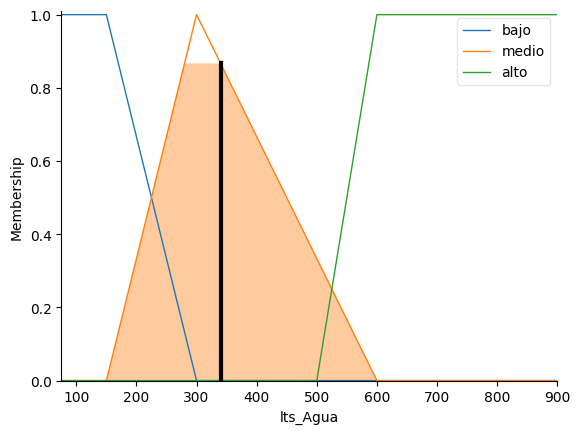

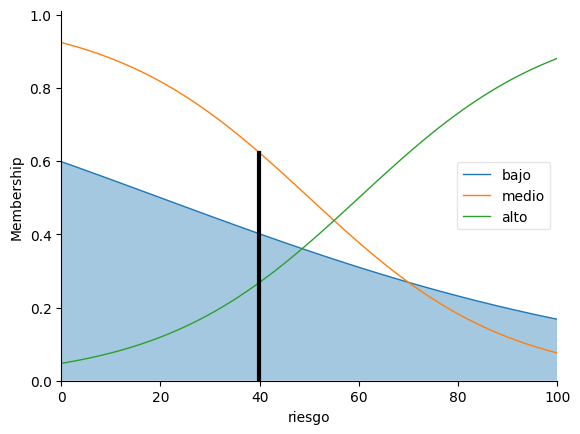

In [71]:
vertimiento.view(sim=riesgo_calculado)
ton_CO2.view(sim=riesgo_calculado)
lts_Agua.view(sim=riesgo_calculado)
riesgo.view(sim=riesgo_calculado)